In [54]:
# Membuat pengecekan tensorflow
import warnings
import tensorflow as tf

print("TensorFlow Version: {}".format(tf.__version__))

if not tf.test.gpu_device_name():
    warnings.warn("No GPU Found: Please ensure you have installed TensorFlow currently")
else:
    print("Default GPU Device: {}".format(tf.test.gpu_device_name()))

TensorFlow Version: 2.3.1


c:\Users\lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: No GPU Found: Please ensure you have installed TensorFlow currently
  


# Import Libraries

In [55]:
# Arsitektur CNN
import tensorflow as tf

from tensorflow.keras import layers, models, callbacks

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Visualisasi
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Pengaturan Direktori
import os

# Log
import pandas as pd

# Pra-pelatihan

In [56]:
# Membuat nama kelas berdasarkan urutan folder
class_names = [ 'a\'in', 'alif', 'ba', 'dal', 'dhod', 'dzal',
                'dzo', 'fa', 'gho\'in', 'ha', 'hamzah', 'jim',
                'kaf', 'kha', 'kho', 'lam', 'lamalif', 'mim',
                'nun', 'qof', 'ro', 'shod', 'sin', 'syin', 
                'ta', 'tho', 'tsa', 'waw', 'ya', 'zain']

## Dataset | Praproses dan Augmentasi

In [57]:
# Menyiapkan Direktori
PATH = 'dataset'
VAL_DATA = 'test'
TRAIN_DIR = os.path.join(PATH, 'train')
VALIDATION_DIR = os.path.join(PATH, VAL_DATA)

BATCH_SIZE = 56
IMG_SIZE = (150, 150)

# Membuat generator pelatihan / Data Augmentation
train_datagen = ImageDataGenerator( 
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      shear_range=0.2,
      height_shift_range=0.2,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='sparse',
                                                    target_size=IMG_SIZE,
                                                    color_mode='rgb'
                                                   )

validation_datagen = ImageDataGenerator( rescale = 1./255 )

# Membuat generator validasi
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='sparse',
                                                    target_size=IMG_SIZE,
                                                    color_mode='rgb'
                                                    )

Found 750 images belonging to 30 classes.
Found 450 images belonging to 30 classes.


Found 15 images belonging to 1 classes.
Found 25 images belonging to 1 classes.
Found 25 images belonging to 1 classes.
Found 25 images belonging to 1 classes.
Found 25 images belonging to 1 classes.
Found 25 images belonging to 1 classes.


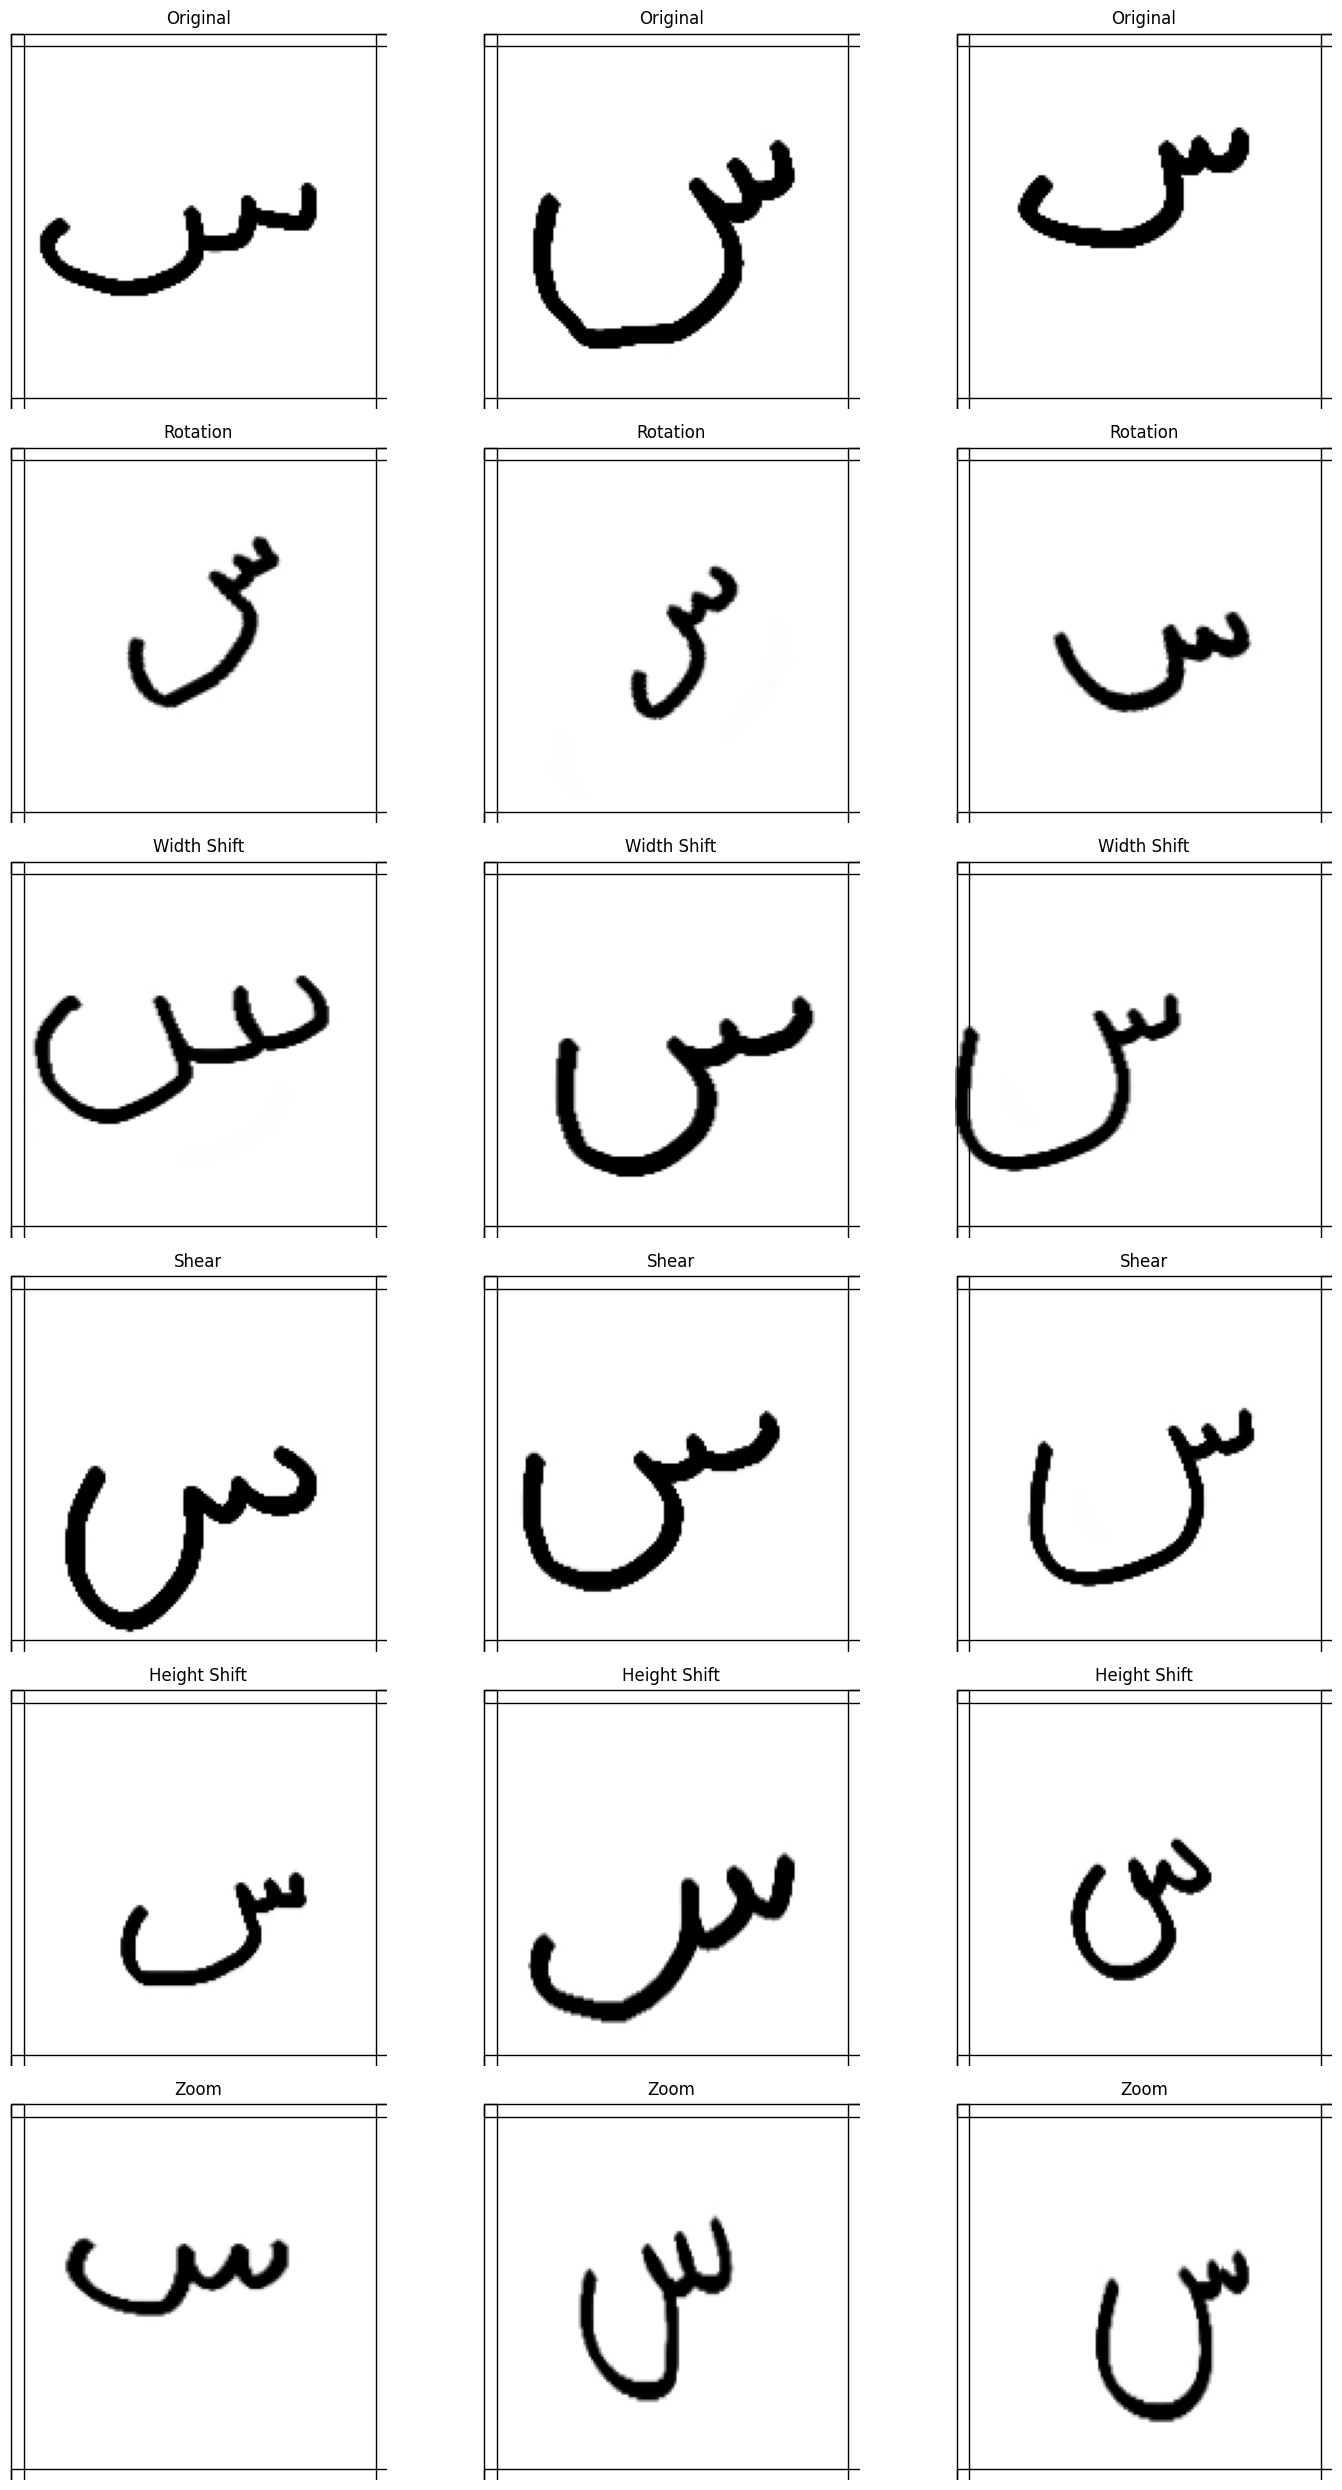

In [58]:
# Membuat generator untuk setiap jenis augmentasi yang berbeda
rescale_datagen = ImageDataGenerator(rescale=1./255)
rotation_datagen = ImageDataGenerator(rotation_range=40, rescale=1./255)
width_shift_datagen = ImageDataGenerator(width_shift_range=0.2, rescale=1./255)
shear_datagen = ImageDataGenerator(shear_range=0.2, rescale=1./255)
height_shift_datagen = ImageDataGenerator(height_shift_range=0.2, rescale=1./255)
zoom_datagen = ImageDataGenerator(zoom_range=0.2, rescale=1./255)

# Memuat gambar asli 'sin'
original_sin_images = next(rescale_datagen.flow_from_directory(
    VALIDATION_DIR,
    classes=['sin'],  
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    target_size=IMG_SIZE,
    color_mode='rgb'
))

# Membuat data augmentasi untuk masing-masing jenis augmentasi
rotation_sin_images = next(rotation_datagen.flow_from_directory(
    TRAIN_DIR,
    classes=['sin'],  
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    target_size=IMG_SIZE,
    color_mode='rgb'
))

width_shift_sin_images = next(width_shift_datagen.flow_from_directory(
    TRAIN_DIR,
    classes=['sin'],  
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    target_size=IMG_SIZE,
    color_mode='rgb'
))

shear_sin_images = next(shear_datagen.flow_from_directory(
    TRAIN_DIR,
    classes=['sin'],  
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    target_size=IMG_SIZE,
    color_mode='rgb'
))

height_shift_sin_images = next(height_shift_datagen.flow_from_directory(
    TRAIN_DIR,
    classes=['sin'],  
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    target_size=IMG_SIZE,
    color_mode='rgb'
))

zoom_sin_images = next(zoom_datagen.flow_from_directory(
    TRAIN_DIR,
    classes=['sin'],  
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    target_size=IMG_SIZE,
    color_mode='rgb'
))

# Menampilkan perbandingan gambar
plt.figure(figsize=(15, 25))

for i, (name, data) in enumerate([
    ('Original', original_sin_images),
    ('Rotation', rotation_sin_images),
    ('Width Shift', width_shift_sin_images),
    ('Shear', shear_sin_images),
    ('Height Shift', height_shift_sin_images),
    ('Zoom', zoom_sin_images)
]):
    for j in range(3):
        ax = plt.subplot(6, 3, i * 3 + j + 1)
        plt.imshow(data[0][j])
        plt.title(f'{name}')
        plt.axis('off')

        # Menambahkan garis pada keempat sisi gambar
        rect_top = plt.Rectangle((0, 0), IMG_SIZE[1], 5, edgecolor='black', linewidth=1, facecolor='none')
        rect_bottom = plt.Rectangle((0, IMG_SIZE[0] - 5), IMG_SIZE[1], 5, edgecolor='black', linewidth=1, facecolor='none')
        rect_left = plt.Rectangle((0, 0), 5, IMG_SIZE[0], edgecolor='black', linewidth=1, facecolor='none')
        rect_right = plt.Rectangle((IMG_SIZE[1] - 5, 0), 5, IMG_SIZE[0], edgecolor='black', linewidth=1, facecolor='none')
        
        ax.add_patch(rect_top)
        ax.add_patch(rect_bottom)
        ax.add_patch(rect_left)
        ax.add_patch(rect_right)

plt.tight_layout()
plt.show()


## Arsitektur CNN

In [59]:
# Membuat arsitektur CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2), padding='valid'))
model.add(layers.Conv2D(64, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2), padding='valid'))
model.add(layers.Conv2D(128, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2), padding='valid'))
model.add(layers.Conv2D(256, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2,2), padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(30, activation='softmax'))

# Melihat detail arsitektur
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 256)      

## Proses Pelatihan

In [60]:
# Callback untuk menyimpan model setiap epoch
model_save_callback = callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}_{accuracy:.3f}.h5', save_best_only=False, save_weights_only=False, monitor='val_accuracy')

# Inisialisasi metrik
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Pelatihan!
history = model.fit( train_generator,
                     steps_per_epoch=train_generator.n // train_generator.batch_size,
                     epochs=100, 
                     validation_data=validation_generator,
                     validation_steps= validation_generator.n // validation_generator.batch_size,
                     callbacks=[
                         model_save_callback
                     ]
                   ) 

Epoch 1/100
13/13 [==============================] - 16s 1s/step - loss: 3.4526 - accuracy: 0.0159 - val_loss: 3.4002 - val_accuracy: 0.0513
Epoch 2/100
13/13 [==============================] - 14s 1s/step - loss: 3.4016 - accuracy: 0.0375 - val_loss: 3.3991 - val_accuracy: 0.0446
Epoch 3/100
13/13 [==============================] - 17s 1s/step - loss: 3.4010 - accuracy: 0.0288 - val_loss: 3.3927 - val_accuracy: 0.0580
Epoch 4/100
13/13 [==============================] - 19s 1s/step - loss: 3.3901 - accuracy: 0.0461 - val_loss: 3.3319 - val_accuracy: 0.0513
Epoch 5/100
13/13 [==============================] - 19s 1s/step - loss: 3.3451 - accuracy: 0.0476 - val_loss: 3.1780 - val_accuracy: 0.0580
Epoch 6/100
13/13 [==============================] - 17s 1s/step - loss: 3.2809 - accuracy: 0.0692 - val_loss: 2.9682 - val_accuracy: 0.1295
Epoch 7/100
13/13 [==============================] - 17s 1s/step - loss: 3.1724 - accuracy: 0.0994 - val_loss: 2.9538 - val_accuracy: 0.1295
Epoch 8/100
1

## Visualisasi metrik

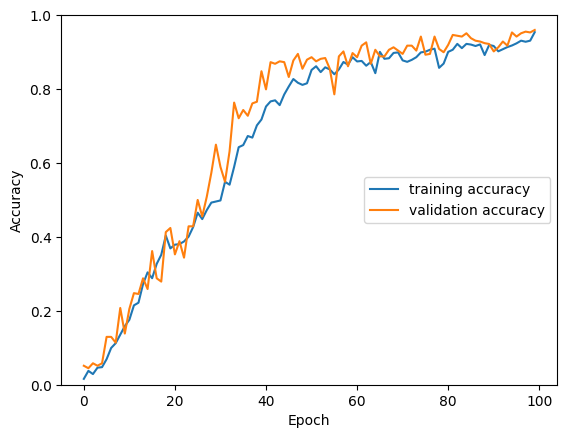

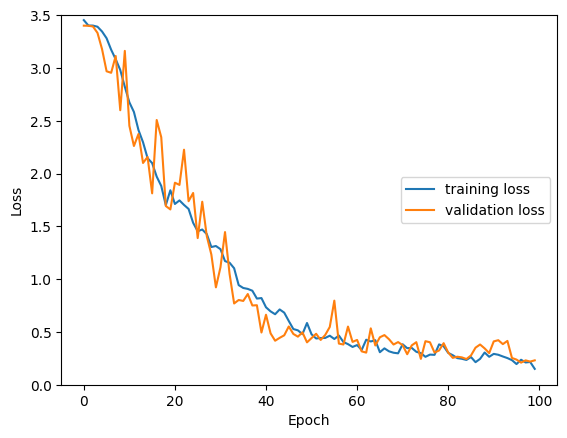

In [61]:
# Menyimpan history pelatihan
pd.DataFrame(history.history).to_csv('history.csv')

# Memvisualisasikan metrik akurasi selama pelatihan 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0., 1]) 
plt.legend(loc='right')
plt.savefig('train_val_acc_augmentation.png')
plt.show()

# Memvisualisasikan metrik loss selama pelatihan
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0., 3.5])
plt.legend(loc='right')
plt.savefig('train_val_loss_augmentation.png')
plt.show()

# Evaluasi Model 

In [47]:
# load model terbaik
loaded_model = models.load_model('models/model_fixx.h5')

In [48]:
# Membuat fungsi load image untuk pengujian
def load_image(img_path):
  # Praproses data uji
  img = load_img(img_path, target_size=(150,150,3))
  img_tensor = img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.0

  return img_tensor

In [49]:
# Membuat generator seperti sebelum pelatihan untuk data uji
PATH = 'dataset'
VAL_DATA = 'test'
VALIDATION_DIR = os.path.join(PATH, VAL_DATA)

BATCH_SIZE = 56
IMG_SIZE = (150, 150)


validation_datagen = ImageDataGenerator( rescale = 1./255 )

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='sparse',
                                                    target_size=IMG_SIZE,
                                                    color_mode='rgb'
                                                    )

Found 450 images belonging to 30 classes.


## Pengujian manual

2


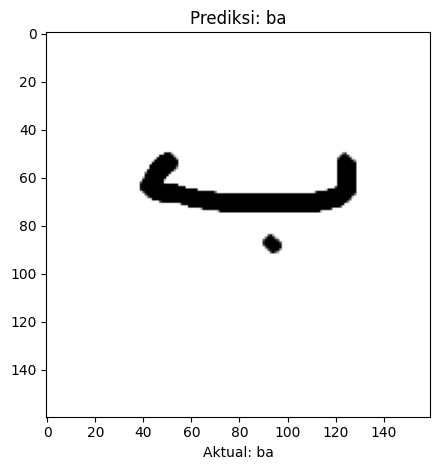

[[1.0673700e-09 1.4628523e-18 9.9815971e+01 1.5496202e-09 1.0844016e-06
  1.3605851e-10 3.3933953e-09 1.7847397e-04 6.9960454e-10 1.5518058e-13
  1.2259909e-09 1.2579057e-05 1.8745699e-04 8.0940941e-11 3.7189078e-08
  2.2653820e-10 4.1945936e-13 1.1174751e-08 3.8993530e-04 1.4490539e-06
  1.0825529e-08 2.7183926e-09 3.0200721e-05 3.4126830e-07 1.8883256e-05
  1.8469612e-12 3.7397618e-09 1.4872135e-06 1.8319325e-01 3.8885140e-09]]


In [50]:
# load data uji
img_path = 'dataset/test/ba/ba.jpg'
new_image = load_image(img_path)

# prediksi
pred = loaded_model.predict(new_image)
pred *= 100
print(np.argmax(pred))

img = load_img(img_path, target_size=(160, 160))
plt.imshow(img)
plt.title("Prediksi: {}".format(class_names[np.argmax(pred)]))
plt.xlabel("Aktual: " + img_path.split("/")[2])
plt.tight_layout()
plt.show()
print(pred)

In [52]:
# Pengujian GUI

from ipywidgets import *
from IPython.display import clear_output, display
from tkinter import Tk, filedialog

def select_files(file):
    clear_output()
    root = Tk()
    root.withdraw() # Hide the main window.
    root.call('wm', 'attributes', '.', '-topmost', True) # Raise the root to the top of all windows.
    file.files = filedialog.askopenfilename(multiple=True) # List of selected files will be set button's file attribute.
    print(file.files) # Print the list of files selected.

In [54]:
fileselect = Button(description="File select")
fileselect.on_click(select_files)

display(fileselect)

('D:/# TUGAS AKHIR/#Tugas Akhir/Program CNN Hijaiyah/dataset/test/shod/hijaiyah (137).jpg',)


21


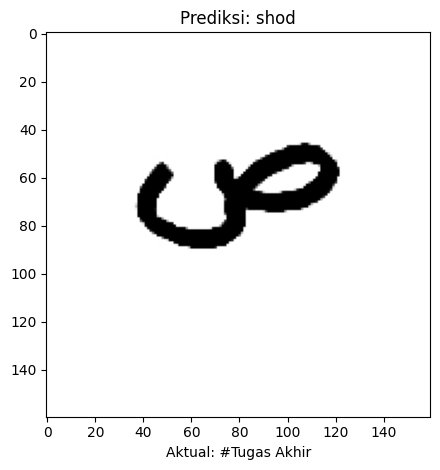

[[1.6505665e-11 0.0000000e+00 3.1307817e-17 2.6294872e-21 4.5209086e-01
  2.9797621e-26 1.4428118e-06 1.9010813e-03 3.1156182e-15 1.7170892e-03
  4.7408487e-11 5.9843391e-10 1.8049308e-10 5.3323305e-12 1.7696648e-11
  4.5334481e-19 1.5347245e-08 2.9426315e-04 5.2162159e-19 3.7466417e-09
  4.1665082e-35 9.9528839e+01 1.0220332e-02 1.4881195e-11 1.9082019e-25
  4.4010207e-03 7.7964736e-30 5.3757225e-04 9.5858198e-08 0.0000000e+00]]


In [55]:
# Don't run this cell if the cell above hadn't run yet

files = fileselect.files
img_path = files[0]
new_image = load_image(img_path)

# prediksi
pred = loaded_model.predict(new_image)
pred *= 100
print(np.argmax(pred))

img = load_img(img_path, target_size=(160, 160))
plt.imshow(img)
plt.title("Prediksi: {}".format(class_names[np.argmax(pred)]))
plt.xlabel("Aktual: " + img_path.split("/")[2])
plt.tight_layout()
plt.show()
print(pred)

In [56]:
# Menghitung akurasi secara manual
total = 0
betul = 0
for folder in class_names:
    for count, filename in enumerate(os.listdir(os.path.join(VALIDATION_DIR, folder))):
        img_path = 'dataset/' + VAL_DATA + '/' + folder + '/'+ filename
        new_image = load_image(img_path)
        pred = loaded_model.predict(new_image)
        if class_names[np.argmax(pred)] == folder:
            betul += 1
        total += 1

print("Akurasi pada data tes: {}%".format((betul/total)*100))

Akurasi pada data tes: 93.55555555555556%


## Confusion Matrix

In [57]:
# Confusion Matrix dan Classification Report
Y_pred = []

for folder in class_names:
    for labels, filename in enumerate(os.listdir(os.path.join(VALIDATION_DIR, folder))):
        img_path = 'dataset/' + VAL_DATA + '/' + folder + '/'+ filename
        new_image = load_image(img_path)
        pred = loaded_model.predict(new_image)
        Y_pred.append(np.argmax(pred, axis=1))

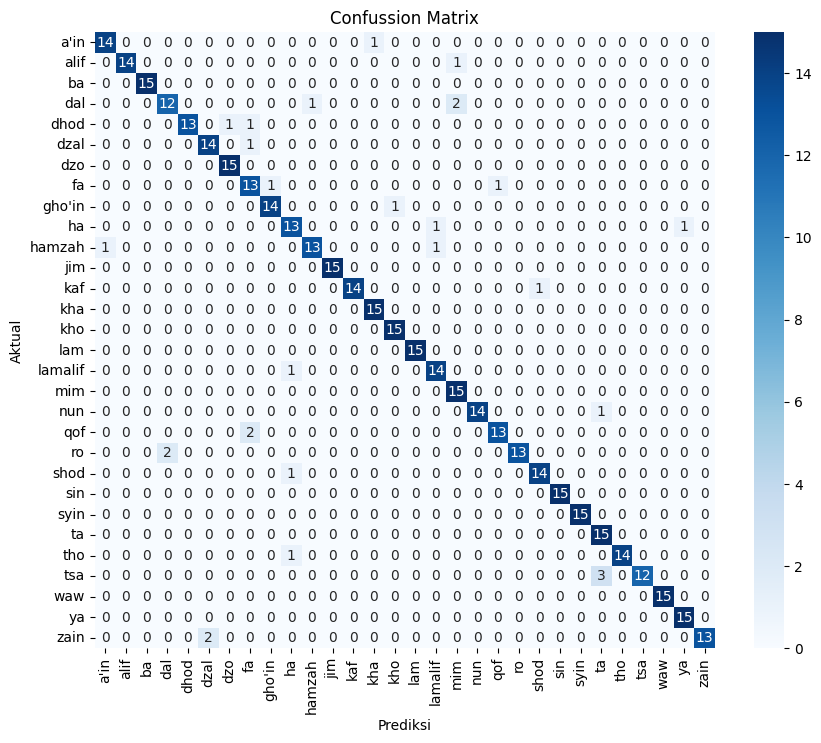



=================Classification Report=================

              precision    recall  f1-score   support

        a'in       0.93      0.93      0.93        15
        alif       1.00      0.93      0.97        15
          ba       1.00      1.00      1.00        15
         dal       0.86      0.80      0.83        15
        dhod       1.00      0.87      0.93        15
        dzal       0.88      0.93      0.90        15
         dzo       0.94      1.00      0.97        15
          fa       0.76      0.87      0.81        15
      gho'in       0.93      0.93      0.93        15
          ha       0.81      0.87      0.84        15
      hamzah       0.93      0.87      0.90        15
         jim       1.00      1.00      1.00        15
         kaf       1.00      0.93      0.97        15
         kha       0.94      1.00      0.97        15
         kho       0.94      1.00      0.97        15
         lam       1.00      1.00      1.00        15
     lamalif       0.8

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Menghitung matriks kebingungan
confusion = confusion_matrix(validation_generator.classes, Y_pred)
target_names = class_names

# Menampilkan matriks kebingungan dalam bentuk heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confussion Matrix')
plt.show()

print('\n\n=================Classification Report=================\n')
print(classification_report(validation_generator.classes, Y_pred, target_names=target_names))


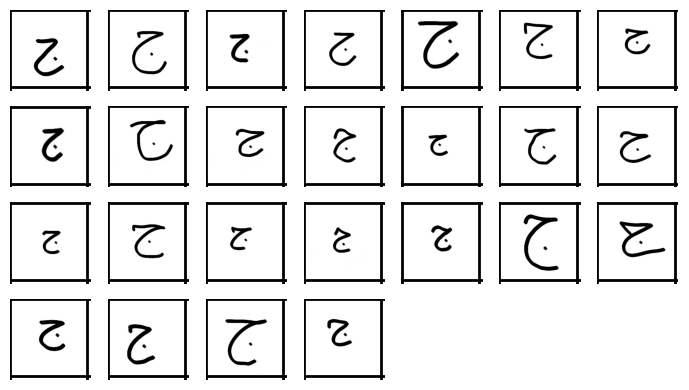

In [4]:
import matplotlib.pyplot as plt
import os

folder_path = 'dataset/train/jim/'  # Ganti dengan path direktori tempat file .png Anda berada

# Mendapatkan daftar file dalam direktori
files = os.listdir(folder_path)

# Memilih 25 file pertama dengan ekstensi .png
png_files = [file for file in files if file.endswith('.jpg')][:25]

# Menampilkan 25 gambar
num_rows = 4
num_cols = 7
fig, axes = plt.subplots(num_rows, num_cols, figsize=(7, 4))
plt.subplots_adjust(wspace=0, hspace=0)

for i, file in enumerate(png_files):
    img = plt.imread(os.path.join(folder_path, file))
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(img)
    axes[row, col].axhline(y=0, color='black', linewidth=2)  # Garis di atas
    axes[row, col].axhline(y=img.shape[0], color='black', linewidth=2)  # Garis di bawah
    axes[row, col].axvline(x=0, color='black', linewidth=2)  # Garis di kiri
    axes[row, col].axvline(x=img.shape[1], color='black', linewidth=2)  # Garis di kanan
    axes[row, col].axis('off')

for i in range(len(png_files), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()